importing basic librarys

In [38]:
import pandas as pd

In [39]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

improting file

In [5]:
data = pd.read_csv('/content/tweet_emotions.csv')

Data analysing

In [6]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [8]:
data.shape

(40000, 3)

checking and handling missing values

In [9]:
data.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

No missing values found

checking out layers


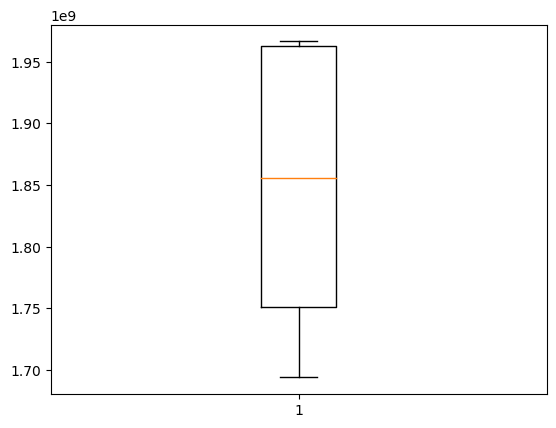

In [13]:
plt.boxplot(data['tweet_id'])
plt.show()

no outlayes found

importing libraries

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Data cleaning

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

data['content'] = data['content'].apply(clean_text)
data.head()


,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,layin n bed headache ughhhh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...


Encoding

In [20]:
X = data['content']
y = data['sentiment']

Test and train data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Future extracion


In [27]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

max_length = max(len(seq) for seq in train_sequences)

X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')


importing
library

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Model building

Traditional machine learning model


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.10      0.01      0.03       338
   happiness       0.33      0.36      0.35      1028
        hate       0.49      0.17      0.25       268
        love       0.49      0.38      0.43       762
     neutral       0.34      0.56      0.42      1740
      relief       0.31      0.03      0.05       352
     sadness       0.35      0.26      0.30      1046
    surprise       0.28      0.04      0.08       425
       worry       0.32      0.46      0.38      1666

    accuracy                           0.35      8000
   macro avg       0.26      0.18      0.18      8000
weighted avg       0.33      0.35      0.31      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


importing library for Deep learning model

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label encoding


In [32]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

one hot encoding


In [33]:
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

under standing the shapes

In [34]:
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


X_train_padded shape: (32000, 32)
y_train_one_hot shape: (32000, 13)
X_test_padded shape: (8000, 32)
y_test_one_hot shape: (8000, 13)


Deep learning model

In [35]:
embedding_dim = 100
num_classes = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_padded, y_train_one_hot, epochs=5, validation_data=(X_test_padded, y_test_one_hot))

y_pred_dl = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_dl, axis=1)

print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/5
1000/1000 [==============================] - 72s 68ms/step - loss: 2.0275 - accuracy: 0.2992 - val_loss: 1.9204 - val_accuracy: 0.3476
Epoch 2/5
1000/1000 [==============================] - 53s 53ms/step - loss: 1.8449 - accuracy: 0.3750 - val_loss: 1.9139 - val_accuracy: 0.3391
Epoch 3/5
1000/1000 [==============================] - 56s 56ms/step - loss: 1.7549 - accuracy: 0.4142 - val_loss: 1.9471 - val_accuracy: 0.3440
Epoch 4/5
1000/1000 [==============================] - 53s 53ms/step - loss: 1.6792 - accuracy: 0.4416 - val_loss: 1.9745 - val_accuracy: 0.3434
Epoch 5/5
250/250 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.08      0.01      0.01       338
   happiness       0.30      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparing the models performence

Traditional machine learning model (Logistic regression ) performance

In [36]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.34575


Deep learning model (LSTM model) performence

In [37]:
print("LSTM Model Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))


LSTM Model Accuracy:  0.334125
